# Tesla Stock Price Prediction with Machine Learning

Predicting Stock prices is a great use case of machine learning both for financial and time series analysis. Tesla has been in the eyes of the world for a long time now as governments of so many countries all over the world are supporting the vision of Tesla. So in this article, I will take you through a tutorial on how to use the Facebook Prophet model for the task of stock price prediction of Tesla.

The dataset that I will be using here has been downloaded from yahoo finance. To download this dataset simply visit yahoo finance and search for TSLA. You will see a dashboard as shown in the image below

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [9]:
from fbprophet import Prophet

In [11]:
import os

In [13]:
os.chdir("E:\\PYTHON NOTES\\projects\\100 data science projeect\\tesla stoke price")

In [14]:
data=pd.read_csv("TSLA.csv")

In [15]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-09,112.417999,115.036003,111.421997,114.599998,114.599998,68250000
1,2020-04-13,118.031998,130.399994,116.106003,130.190002,130.190002,112377000
2,2020-04-14,139.794006,148.376007,138.485992,141.977997,141.977997,152882500
3,2020-04-15,148.399994,150.626007,142.000000,145.966003,145.966003,117885000
4,2020-04-16,143.388000,151.889999,141.343994,149.042007,149.042007,103289500
...,...,...,...,...,...,...,...
246,2021-04-01,688.369995,692.419983,659.419983,661.750000,661.750000,35206300
247,2021-04-05,707.710022,708.159973,684.700012,691.049988,691.049988,41842800
248,2021-04-06,690.299988,696.549988,681.369995,691.619995,691.619995,28271800
249,2021-04-07,687.000000,691.380005,667.840027,670.969971,670.969971,26309400


Before moving forward let’s visualize the “Close” column in the dataset which represents close prices of each day:

Text(0, 0.5, 'close')

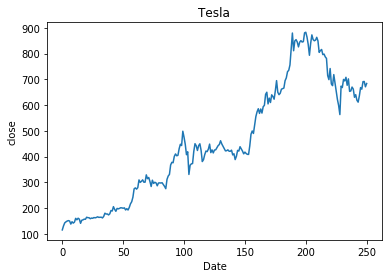

In [20]:
close=data["Close"]
ax=close.plot(title="Tesla")
ax.set_xlabel("Date")
ax.set_ylabel("close")

We only need two columns from this dataset (Date and Close), so let’s create a new DataFrame with only these two columns:

In [21]:
data["Date"]=pd.to_datetime(data["Date"],infer_datetime_format="True")

In [24]:
data=data[["Date","Close"]]

In [25]:
data

,Date,Close
0,2020-04-09,114.599998
1,2020-04-13,130.190002
2,2020-04-14,141.977997
3,2020-04-15,145.966003
4,2020-04-16,149.042007
...,...,...
246,2021-04-01,661.750000
247,2021-04-05,691.049988
248,2021-04-06,691.619995
249,2021-04-07,670.969971


As we are using the Facebook prophet model here for predicting the stock prices of Tesla so we need to rename the columns

In [26]:
data=data.rename(columns={"Date":"ds","Close":"y"})

In [27]:
data

,ds,y
0,2020-04-09,114.599998
1,2020-04-13,130.190002
2,2020-04-14,141.977997
3,2020-04-15,145.966003
4,2020-04-16,149.042007
...,...,...
246,2021-04-01,661.750000
247,2021-04-05,691.049988
248,2021-04-06,691.619995
249,2021-04-07,670.969971


In [29]:
model=Prophet()

In [30]:
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  (dates - pd.datetime(1970, 1, 1))


In [32]:
future=model.make_future_dataframe(periods=365)


In [34]:
forcast=model.predict(future)

C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  (dates - pd.datetime(1970, 1, 1))
C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  (dates - pd.datetime(1970, 1, 1))


In [37]:
forcast[["ds","yhat","yhat_lower","yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
611,2022-04-04,-378.662608,-1313.359299,561.904978
612,2022-04-05,-379.905525,-1313.808786,577.977330
613,2022-04-06,-382.583541,-1322.936244,568.347260
614,2022-04-07,-385.871475,-1338.865196,553.897647
615,2022-04-08,-390.858766,-1328.956976,562.935504


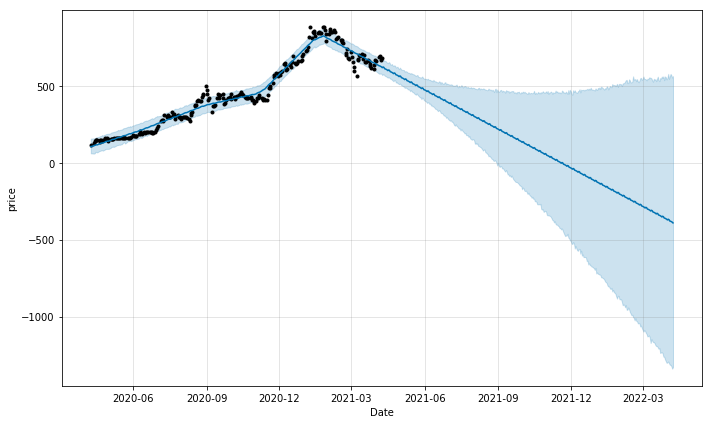

In [43]:
graph=model.plot(forcast,xlabel="Date",ylabel="price")

# Conclusion


It seems like Tesla’s stock prices will decrease in the coming future if they don’t come up with a new idea of representing their vision.